In [1]:
# modules for research report
from datascience import *
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

# module for YouTube video
from IPython.display import YouTubeVideo

# okpy config
from client.api.notebook import Notebook
ok = Notebook('music-final-project.ok')
_ = ok.auth(inline=True)

Assignment: Final Project: Free Music Archive
OK, version v1.12.5

Successfully logged in as lcm_19@berkeley.edu


# Free Music Archive: A Dataset For Music Analysis

This dataset was introduced by Michaël Defferrard, Kirell Benzi, Pierre Vandergheynst, and Xavier Bresson at the International Society for Music Information Retrieval (MIR) Conference in 2017.
It has been cleaned for your convenience: all missing values have been removed, and low-quality observations and variables have been filtered out. A brief summary of the dataset, originally
given at the conference, is provided below. 

**NB: You may not copy any public analyses of this dataset. Doing so will result in a zero.**

## Summary

>We introduce the Free Music Archive (FMA), an open and easily accessible dataset suitable for evaluating several tasks in MIR, a field concerned with browsing, searching, and
organizing large music collections. The community's growing interest in feature and end-to-end learning is however restrained by the limited availability of large audio datasets.
The FMA aims to overcome this hurdle by providing 917 GiB and 343 days of Creative Commons-licensed audio from 106,574 tracks from 16,341 artists and 14,854 albums, arranged in a
hierarchical taxonomy of 161 genres. It provides full-length and high-quality audio, pre-computed features, together with track- and user-level metadata, tags, and free-form text
such as biographies.

A small, random subset of this larger dataset is provided to you.

## Data Description

This dataset consists of three tables stored in the `data` folder:
1. `tracks` provides information on individual tracks.
2. `genres` contains information on all of the genres.
3. `features` contains information on the Spotify audio features of each track.

A description of each table's variables is provided below:

`tracks`:
* `track_id`: a unique ID for each track
* `track_title`: title of each track
* `artist_name`: name of the artist
* `album_title`: title of the album that the track comes from
* `track_duration`: the length of the song in seconds
* `track_genre`: the genre(s) that the track fall(s) into
* `album_date_released`: a string indicating the album release date
* `album_type`: specifies whether the album is studio-recorded, live, or from a radio program
* `album_tracks`: number of tracks on the album

`genres`:
* `genre_id`: a unique ID for each genre
* `title`: the name of the genre
* `# tracks`: the number of tracks that fall into this genre
* `parent`: the genre that this subgenre falls under (will be 0 if not a subgenre)

`features` (descriptions from the [Spotify API page](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)):
* `track_id`: a unique ID for each track
* `acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* `danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* `energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
* `instrumentalness`: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. 
* `liveness	`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
* `speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. 
* `tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
* `valence`: 	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

## Inspiration

A variety of exploratory analyses, hypothesis tests, and predictions problems can tackled with this data. Here are a few ideas to get
you started:


1. Which genre has the longest songs?
3. Is there a relationship between danceability and energy? What about danceability and valence?
4. Can you classify which genre (of [pick 2 once we see data]) based on its features?
5. Do (pick 2 genres or parent genres) have the same average energy?

Don't forget to review the [Final Project Guidelines](https://docs.google.com/document/d/1NuHDYTdWGwhPNRov8Y3I8y6R7Rbyf-WDOfQwovD-gmw/edit?usp=sharing) for a complete list of requirements.

## Preview

The tables are loaded in the code cells below. Take some time to explore them!

In [2]:
#load genres
genres = Table().read_table("data/genres_final.csv")
genres

genre_id,title,#tracks,parent
1,Avant-Garde,8693,38
2,International,5271,0
3,Blues,1752,0
4,Jazz,4126,0
5,Classical,4106,0
6,Novelty,914,38
7,Comedy,217,20
8,Old-Time / Historic,868,0
9,Country,1987,0
10,Pop,13845,0


In [3]:
#load features
features = Table().read_table("data/features_final.csv")
features

track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
145,0.235506,0.438672,0.487752,0.716122,0.0703593,0.0472978,120.79,0.650452
155,0.981657,0.142249,0.912122,0.967294,0.36351,0.087527,91.912,0.0343253
201,0.991813,0.461855,0.543751,0.964922,0.137006,0.0256877,93.945,0.758632
307,0.77377,0.552026,0.251328,0.568976,0.110743,0.0506326,117.247,0.356984
309,0.335481,0.390263,0.0210674,0.937508,0.0890457,0.0414906,60.382,0.0399321
319,0.890498,0.316413,0.0596131,0.913303,0.108808,0.0387785,133.934,0.122417
327,0.928171,0.553091,0.303937,0.95423,0.110752,0.107401,110.039,0.616368
328,0.297541,0.624953,0.176884,0.815871,0.0928226,0.0551486,114.858,0.503635
350,0.989664,0.463938,0.363612,0.919011,0.11874,0.0376218,99.384,0.591003
364,0.98638,0.61286,0.15611,0.104549,0.107289,0.198543,109.256,0.483544


In [4]:
#load tracks
tracks = Table().read_table("data/tracks_final.csv")
tracks

track_id,track_title,artist_name,album_title,track_duration,track_genre,album_date_released,album_type,album_tracks
145,Amoebiasis,Amoebic Ensemble,Amoebiasis,326,Jazz,2009-01-06,Album,0
155,Maps of the Stars Homes,Arc and Sender,unreleased demo,756,Rock,2009-01-06,Single Tracks,1
201,Big City,Ed Askew,What I Know,210,Folk,2009-01-07,Album,10
307,Out on the farm,Blah Blah Blah,Green Collection,205,Rock,2007-09-01,Album,0
309,Where are all the people,Blah Blah Blah,Green Collection,229,Rock,2007-09-01,Album,0
319,Complete Shakespeare,Blah Blah Blah,Green Collection,156,Rock,2007-09-01,Album,0
327,Hands Beckoning,Blah Blah Blah,Stripey Collection,259,Rock,1982-04-06,Album,0
328,Central Park,Blah Blah Blah,Stripey Collection,236,Rock,1982-04-06,Album,0
350,Gotta Go,Blah Blah Blah,30th Anniversary Blah Blah Blah,101,Rock,2009-01-01,Album,21
364,Sunspot activity,Blah Blah Blah,30th Anniversary Blah Blah Blah,152,Rock,2009-01-01,Album,21


<br>

# Research Report

## Introduction
### Source
Our data source is from the Free Music Archive (FMA), which is a large dataset containing over 106,574 tracks from different artists and genres. We are going to analyze a small, random subset of the whole dataset with three tables: tracks, genres, and features. We link ```tracks``` and ```features``` by the unique ```track_id``` of each track to perform our analysis.
### Observation
Using simple ```numpy``` and ```Table``` operations, we made a few observations. We discovered that the genre of the longest song in the dataset is Rock; Jazz music has the longest average ```track_duration```; A band named *Blah Blah Blah* has the most appearances among all Rock tracks; And lastly, Blues music has the lowest ```valence``` value. Out of 459 tracks, 215 of them are labeled as Rock in ```track_genre``` and 110 of them are labeled as Electronic. In other words, roughly $70\%$ of tracks are either Rock or Jazz music.
### Variables
We notice that the most important variables to our analysis mainly locate in the ```features``` table, for variables in this table, other than the ```track_id``` reserved for table aggregation, are all qualitative data that captures the characteristics of music. We conduct both parts of our analysis by manipulating variables in this table. Other than variables in the ```features``` table, by joining tables, ```track_duration``` is an another qualitative variable that plays a role in our analysis. As of categorical data, we only chose ```track_genre``` from the ```tracks``` table, since both parts of our analysis are closely related to genres of music.


## Hypothesis Testing and Prediction Questions

**Please bold your hypothesis testing and prediction questions.**

**Hypothesis Testing Question**

**We notice a difference in distributions of tempos between Rock and Electronic music, and we want to know where this difference is coming from. We decide to perform an A/B testing with the null hypothesis being that the difference is due to a chance model, and with the alternative hypothesis being that Rock music tends to have a faster tempo on average than Electronic music and hence brings the difference. We will use a common $5\%$ as our choice for p_value and we use the absolute difference between two averages as our test statistic.**

**Prediction Question**

**We decide to conduct KNN classification using features from ```features``` table and wish to correctly classify Rock and Electronic music using these variables. We believe classifying genres of music based on their qualitative traits is more valuable than using linear regession to predict. For instance, predicting the ```valence``` of a piece of music from other features is not particularly helpful for people to interpret it.**

## Exploratory Data Analysis

**You may change the order of the plots and tables.**

**Quantitative Plot:**

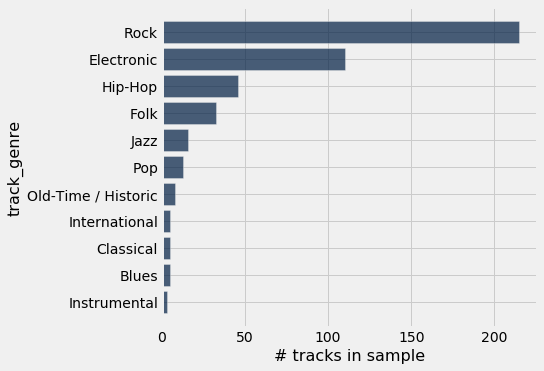

In [5]:
# Use this cell to generate your quantitative plot
tracks.group('track_genre').sort('count', descending = True).relabel('count', '# tracks in sample').barh('track_genre', '# tracks in sample')

*From this plot, we learned that the distribution indicates that the sample is possibly biased. This limits our ability to experiment with data of tracks that are classified in, for example, international or classical. In other words, the ```tracks``` table is not represetative enough for genres other than Rock, Electronic, Hip-Hop and Folk.*

**Qualitative Plot:**

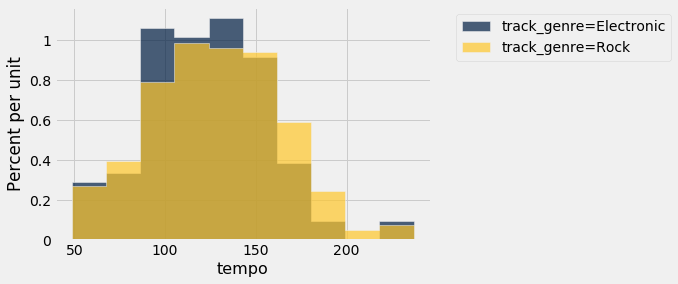

In [6]:
# Use this cell to generate your qualitative plot
tracks.join('track_id', features).where('track_genre', are.contained_in('Rock Electronic')).hist('tempo', group='track_genre')

*After genreating the quantative plot, we decide to work with Rock and Electronic music. From plotting the given data, we noticed a small difference between the distribution of tempos for these two kinds of music. This difference motivates us to use hypothesis testing to find out where this difference is coming from.*

**Aggregated Data Table:**

In [7]:
# Use this cell to generate your aggregated data table
tracks.join('track_id', features).with_column('danceability h/l', tracks.join('track_id', features).apply(lambda v: 'High' if v > 0.5 else 'Low', 'danceability')).pivot('track_genre', 'danceability h/l').select('danceability h/l', 'Electronic', 'Rock')

danceability h/l,Electronic,Rock
High,68,63
Low,42,152


*By giving labels to features, we were able to perform pivot operation on ```tracks``` after joining it with ```features``` to help with our feature selection in the prediction part of our project. ```danceability``` is one of the many features we ended up using in the prediction part. Using the exact same approach, we were able to obtain the other three of our features used in prediction: ```acousticness```,  ```energy```, ```instrumentalness```.*

**Table Requiring a Join Operation:**

In [8]:
# We changed the order of the blocks since this fits our workflow better
# Use this cell to join two datasets
t_f = tracks.join('track_id', features).select(['track_id', 'track_title', 'track_genre'] + list(features.labels)) # Join tracks and features using 'track_id'
t_f

track_id,track_title,track_genre,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
145,Amoebiasis,Jazz,0.235506,0.438672,0.487752,0.716122,0.0703593,0.0472978,120.79,0.650452
155,Maps of the Stars Homes,Rock,0.981657,0.142249,0.912122,0.967294,0.36351,0.087527,91.912,0.0343253
201,Big City,Folk,0.991813,0.461855,0.543751,0.964922,0.137006,0.0256877,93.945,0.758632
307,Out on the farm,Rock,0.77377,0.552026,0.251328,0.568976,0.110743,0.0506326,117.247,0.356984
309,Where are all the people,Rock,0.335481,0.390263,0.0210674,0.937508,0.0890457,0.0414906,60.382,0.0399321
319,Complete Shakespeare,Rock,0.890498,0.316413,0.0596131,0.913303,0.108808,0.0387785,133.934,0.122417
327,Hands Beckoning,Rock,0.928171,0.553091,0.303937,0.95423,0.110752,0.107401,110.039,0.616368
328,Central Park,Rock,0.297541,0.624953,0.176884,0.815871,0.0928226,0.0551486,114.858,0.503635
350,Gotta Go,Rock,0.989664,0.463938,0.363612,0.919011,0.11874,0.0376218,99.384,0.591003
364,Sunspot activity,Rock,0.98638,0.61286,0.15611,0.104549,0.107289,0.198543,109.256,0.483544


*We use ```track_id```, the primary key in ```tracks``` and ```features``` table to construct this table. Then we chose to drop redundant labels such as ```album_date_released``` and ```album_type```. The resulting table will be crucial to our subsequent analysis as all of our operations rely on this table.*

## Hypothesis Testing

**Do not copy code from demo notebooks or homeworks! You may split portions of your code into distinct cells. Also, be sure to
set a random seed so that your results are reproducible.**

We decide to perform an A/B testing with the null hypothesis being that the difference is due to a chance model, and with the alternative hypothesis being that Rock music tends to have a faster tempo on average than Electronic music and hence brings the difference. We will use a common $5\%$ as our choice for p_value and we use the difference between two averages as our test statistic. We choose the difference between two averages because this choice aligns with our hypothesis testing question. Since this project is not regarding an academic topic, we settled on the commonly seen 0.05 as our p_value.

In [9]:
# set the random seed so that results are reproducible
np.random.seed(109)

# Calculate the mean difference of a feature between music grouped by input labels
def mean_difference(table, group_label):
    mean_table = table.group(group_label, np.mean)
    return mean_table.column(1).item(1) - mean_table.column(1).item(0)

# Function used to perform hypothesis testing simulation
def simulate(table, genre_1, genre_2, feature, group_label):
    selected_genres = table.where(group_label, are.contained_in(genre_1 + ' ' + genre_2))
    shuffled_labels = selected_genres.sample(with_replacement=False).column(group_label)
    shuffled_table = selected_genres.select(feature).with_column('Shuffled Label', shuffled_labels)
    return mean_difference(shuffled_table, 'Shuffled Label')

# Return the observed value for the permutation test
def observed(genre_1, genre_2, feature, group_label, table=t_f):
    return mean_difference(table.where(group_label, are.contained_in(genre_1 + ' ' + genre_2)).select(feature, group_label), group_label)

# Function used to perform the entire permutation test and output test results / graphs
def permutation_test(repetitions, table, genre_1, genre_2, feature, group_label, direction):
    """
    repetitions: number of simulations you wish to conduct
    table: table for data
    genre_1: first genre you want to use
    genre_2: second genre you want to use
    feature: feature of the music
    group_label: label of the music used to group values
    direction: direction of the alternative model
    """
    differences = make_array()
    for i in range(repetitions):
        differences = np.append(differences, simulate(table, genre_1, genre_2, feature, group_label))
    observed_value = observed(genre_1, genre_2, feature, group_label, table)
    Table().with_column('Differences of ave rage tempos between Rock and Electronic', differences).hist()
    plots.scatter(observed_value, 0, color='red', s=100)
    print('Observed value is', observed_value)
    if direction == 'left':
        print('empirical p_value is', np.count_nonzero(differences <= observed_value) / repetitions)
    if direction == 'right':
        print('empirical p_value is', np.count_nonzero(differences >= observed_value) / repetitions)

Observed value is 4.3894164904862265
empirical p_value is 0.121


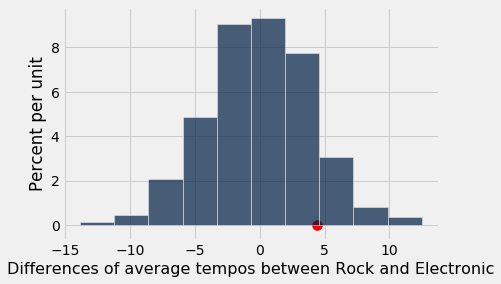

In [10]:
# Perform permutation test using our created function
permutation_test(1000, t_f, 'Rock', 'Electronic', 'tempo', 'track_genre', 'right')

### Hypothesis Testing Result

After table manipulations and 1000 simulations for the permutation test, we obtained that observed value is roughly 4.39 and empirical p_value is 0.121. Referencing the selected $5\%$ p_value, our empirical p_value is not significant enough for us to reject the null hypothesis. In other words, the small discrepancies appeared in the dataset are due to a chance model.

## Prediction

**Be sure to set a random seed so that your results are reproducible.**

After looking into and experimenting with the dataset, we quickly came to an argument: Using features of music to perform linear regression in hope of predicting another qualitative trait of music is not valuable. Therefore, we turned our heads to KNN classification, since it is way more meaningful to classify music based on its qualitative characteristics. For instance, if people are having a hard time to recognize the genre of the music they are listening to, and they do not possess professional music knowledge, they can pick up our classifier and it will help them tremendously. About 85% of our total dataset is used to construct the training set, and the left 15% is reserved for testing. Using the KNN classification with ```k=3```, we are able to classify between Rock and Electronic through these features: ```acousticness```, ```danceability```, ```energy``` and ```instrumentalness```. We select these features based on the reasoning in the aggreated table section above.

In [11]:
# set the random seed so that results are reproducible
np.random.seed(109)

def su(column):
    return (column - np.mean(column)) / np.std(column)

# Function that transform data of two genres into standard units
def into_su(table, genre_1, genre_2):
    table = table.where('track_genre', are.contained_in(genre_1 + " " + genre_2))
    return Table().with_columns(
        'track_genre', table.column('track_genre'),
        'track_title', table.column('track_title'),
        'acousticness', su(table.column('acousticness')),
        'danceability', su(table.column('danceability')),
        'energy', su(table.column('energy')),
        'instrumentalness', su(table.column('instrumentalness')),
        'liveness', su(table.column('liveness')),
        'speechiness', su(table.column('speechiness')),
        'tempo', su(table.column('tempo')),
        'valence', su(table.column('valence'))
    )

# Distance between two rows of features
def distance(test, train):
    return np.sqrt(np.sum((np.array(list(test)) - np.array(list(train)))**2))

# Return the most common class among k nearest neigbors to test_row
def classify(test_row, train_rows, train_labels, k):
    distances = np.array([distance(test_row, train_row) for train_row in train_rows.rows])
    genre_and_distances = Table().with_columns('Genre', train_labels, 'Distance', distances).sort('Distance')
    return genre_and_distances.take(np.arange(k)).group('Genre').sort('count', descending = True).column('Genre').item(0)

# Takes one test row and return the most commonn class among k nearest neighbors to it
def classify_feature_row(row):
    return classify(row, train_features, train_tracks.column('track_genre'), 3)

In [12]:
# Transform data into standard units
rock_electronic_su = into_su(t_f, 'Rock', 'Electronic')

# We choose 85% of our dataset to construct the training set and the left 15% to construct the test set
training_proportion = 275/325

shuffeled_table = rock_electronic_su.sample(with_replacement=False)
num_tracks = shuffeled_table.num_rows
num_train = int(num_tracks * training_proportion)
num_test = num_tracks - num_train

train_tracks = shuffeled_table.take(np.arange(num_train))
test_tracks = shuffeled_table.take(np.arange(num_train, num_tracks))

print("Training set size: ",   train_tracks.num_rows, ";",
      "Test set size: ",       test_tracks.num_rows)

# Choose features
prediction_features = make_array('acousticness', 'danceability', 'energy', 'instrumentalness')

train_features = train_tracks.select(prediction_features)
test_features = test_tracks.select(prediction_features)

Training set size:  275 ; Test set size:  50


In [13]:
# Perform prediction using k-value of 3
test_guesses = test_features.apply(classify_feature_row)
proportion_correct = np.count_nonzero(test_guesses == test_tracks.column('track_genre')) / test_tracks.num_rows
proportion_correct

0.9

In [14]:
# Show the table of correctness and explore patterns in mistakes
test_track_correctness = test_tracks.select('track_title', 'track_genre').with_column('Was correct', test_guesses == test_tracks.column('track_genre'))
test_tracks.join('track_title', test_track_correctness).select(['track_genre'] + list(prediction_features) + ['Was correct']).sort('Was correct', descending=False).show(5)

track_genre,acousticness,danceability,energy,instrumentalness,Was correct
Electronic,0.981998,-0.675465,-1.29283,0.62478,False
Rock,1.10619,1.62896,-1.88411,0.48764,False
Electronic,-0.525448,-0.0270166,-0.997525,0.243931,False
Electronic,1.24785,-0.301917,-0.562653,-0.794205,False
Electronic,0.560187,0.947889,-1.29486,-0.761794,False


From the value of ```proportion_correct```, we get to know that our classifier has an accuracy of $90\%$. By pulling out the table of mistakes, we can't really directly tell any patterns in them. However, we did notice that music could be classified into multiple genres and yet the data we operated upon only has music classified in a single genre. We know that KNN classifier tends to make mistakes along the decision boundary, and music that are labeled with multiple genres tends to live on such boundary. In this case, the mistakes that our classifier made could've been classified with genre Rock / Electronic in the original dataset, but the sample data cannot reflect this.

## Conclusion

With p-value of 5%, we failed to reject our null hypothesis, meaning that the small discrepancies appeared in the dataset are due to a chance model. The accuracy of our KNN classfier with ```k=3``` is $90\%$, which is good enough for a small dataset with 325 Rock and Electronic tracks in total. 

We did notice some limitations in our explorations with the sampled dataset. In our observations of the dataset, we noticed an abnormality that the sum of ```#tracks``` in ```genres``` table does not add up to the number of total tracks mentioned in the project introduction. We think this might be caused by duplicates in the original dataset, since a piece of music can be simultaneously classified into different genres. However, we only see one genre being assigned to each track in ```tracks``` table, and this will introduce bias towards our understanding of the sample's population distribution. We would love to perform **Bootstrapping** on ```tracks``` table to get a better sense at how the original distribution looks like. Nevertheless, we already lost the information of whether the track is being labeled in multiple genres. Therefore, our produced estimation would still be flawed since it comes from a potentially biased data sample.


## Presentation

*In this section, you'll need to provide a link to your video presentation. If you've uploaded your presentation to YouTube,
you can include the URL in the code below. We've provided an example to show you how to do this. Otherwise, provide the link
in a markdown cell.*

**Link:** *Replace this text with a link to your video presentation*

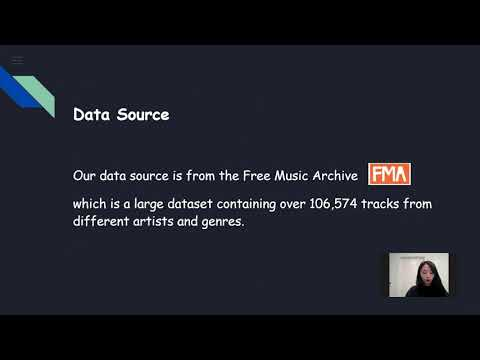

In [15]:
# Full Link: https://www.youtube.com/watch?v=BKgdDLrSC5s&feature=emb_logo
# Plug in string between "v=" and ""&feature":
YouTubeVideo('hKUHgwcUilk')

# Submission

*Just as with the other assignments in this course, please submit your research notebook to Okpy. We suggest that you
submit often so that your progress is saved.*

In [ ]:
# Run this line to submit your work
_ = ok.submit()

<IPython.core.display.Javascript object>